In [2]:
import geopandas as gpd
import libpysal
import numpy as np 

###Carregar shapefile
shapefile_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\MT_Municipios_2022\MT_Municipios_2022.shp"
municipalities = gpd.read_file(shapefile_path)
municipalities

CD_MUN            NM_MUN SIGLA_UF   AREA_KM2  \
0    5100102          Acorizal       MT    850.763   
1    5100201          Água Boa       MT   7549.308   
2    5100250     Alta Floresta       MT   8955.410   
3    5100300     Alto Araguaia       MT   5402.308   
4    5100359    Alto Boa Vista       MT   2248.414   
..       ...               ...      ...        ...   
136  5108600         Vila Rica       MT   7436.383   
137  5108808      Nova Guarita       MT   1121.928   
138  5108857   Nova Marilândia       MT   1905.744   
139  5108907      Nova Maringá       MT  11553.479   
140  5108956  Nova Monte Verde       MT   5139.307   

                                              geometry  
0    POLYGON ((-56.38285 -15.20436, -56.38378 -15.2...  
1    POLYGON ((-51.89384 -14.16218, -51.89387 -14.1...  
2    POLYGON ((-55.89221 -9.43221, -55.8672 -9.4342...  
3    POLYGON ((-53.21098 -17.31781, -53.21116 -17.3...  
4    POLYGON ((-51.45325 -11.67644, -51.45313 -11.6...  
..                                                 ...  
136  POLYGON ((-51.0611 -10.25032, -51.06162 -10.25...  
137  POLYGON ((-55.43861 -10.39025, -55.43896 -10.3...  
138  POLYGON ((-57.00437 -14.41621, -57.0052 -14.41...  
139  POLYGON ((-56.89106 -13.19147, -56.89121 -13.1...  
140  POLYGON ((-57.4944 -10.26973, -57.49538 -10.26...  

[141 rows x 5 columns]

In [3]:
# Create the Queen contiguity matrix from the unique municipalities
W = libpysal.weights.Queen.from_dataframe(municipalities)

W

C:\Users\daves\AppData\Local\Temp\ipykernel_18880\9985370.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = libpysal.weights.Queen.from_dataframe(municipalities)


In [4]:
import pandas as pd
# Load data
file_path = "C:\\Users\\daves\\OneDrive\\Pessoal\\Acadêmico\\Mestrado\\Dissertação - Execução\\Análises\\VBP\\VBP.xlsx"
sheet_name = "VBP Corrigido"
df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')

In [5]:
# Substitute missing by zero
df.fillna(0, inplace=True)
df

Cidades                Mesorregião  \
0                            Acorizal   CENTRO-SUL MATO-GROSSENSE   
1                            Água Boa     NORDESTE MATO-GROSSENSE   
2                       Alta Floresta        NORTE MATO-GROSSENSE   
3                       Alto Araguaia      SUDESTE MATO-GROSSENSE   
4                      Alto Boa Vista     NORDESTE MATO-GROSSENSE   
..                                 ...                        ...   
136              Vale de São Domingos     SUDOESTE MATO-GROSSENSE   
137                     Várzea Grande   CENTRO-SUL MATO-GROSSENSE   
138                              Vera        NORTE MATO-GROSSENSE   
139  Vila Bela da Santíssima Trindade     SUDOESTE MATO-GROSSENSE   
140                         Vila Rica     NORDESTE MATO-GROSSENSE   

                 Região imediata Região intermediária           1994  \
0                         Cuiabá               Cuiabá   28345.336653   
1                       Água Boa      Barra do Garças  279221.305127   
2                  Alta Floresta                Sinop  153696.468884   
3                   Rondonópolis         Rondonópolis   44752.470237   
4           Confresa - Vila Rica      Barra do Garças   20307.578237   
..                           ...                  ...            ...   
136  Pontes e Lacerda - Comodoro              Cáceres       0.000000   
137                       Cuiabá               Cuiabá    7927.219499   
138                      Sorriso                Sinop   37362.154051   
139  Pontes e Lacerda - Comodoro              Cáceres   22913.138431   
140         Confresa - Vila Rica      Barra do Garças   86915.171554   

              1995           1996           1997           1998  \
0     12655.078628   12757.825719   13458.532359    8866.301287   
1    147598.577256  150589.877629  176195.864894  177439.599189   
2    106351.696543   59205.478635   55965.784764   77987.107815   
3     21887.062216   30353.948616   46518.854687   59944.071123   
4     17785.006178    8581.611312   12687.675450   11955.499344   
..             ...            ...            ...            ...   
136       0.000000       0.000000       0.000000       0.000000   
137    7676.031299     721.500456    1211.346571    2051.893808   
138   10995.396185   64255.981830   34680.695014   42945.910245   
139   26639.789212   26517.263836   35357.161281   15597.421563   
140   41444.911004   26355.987263   49547.221115   17823.461339   

              1999  ...           2014           2015          2016  \
0     29866.114121  ...    6731.349096    3528.348470  4.356031e+03   
1    120790.781299  ...  739242.146094  785047.988163  6.202718e+05   
2     60099.518191  ...   70558.744165  103645.236304  1.025920e+05   
3     64663.435881  ...  310278.862829  294619.006519  2.994416e+05   
4     17174.205911  ...   80076.112521  138266.201026  1.322213e+05   
..             ...  ...            ...            ...           ...   
136       0.000000  ...   10609.324622   28541.818873  2.599064e+04   
137    2149.326364  ...    4710.719744    1153.204803  2.136431e+03   
138   42802.882297  ...  863251.639238  914485.680896  1.175273e+06   
139   15684.641121  ...   74375.488498  125332.741862  1.192607e+05   
140   20908.320385  ...  186853.107054  147509.022965  3.121857e+05   

              2017           2018           2019          2020          2021  \
0      3945.503070    2664.752490    3340.216851  3.863883e+03  5.369270e+03   
1    791791.587820  995324.791230  906125.584975  1.120966e+06  1.917731e+06   
2    144890.405475  189224.998807  192282.702998  2.516354e+05  3.650753e+05   
3    281181.021527  261077.624993  397959.920273  3.476034e+05  5.633387e+05   
4    155007.300037  146256.473107  144949.199649  1.894250e+05  3.475083e+05   
..             ...            ...            ...           ...           ...   
136    6857.864405   27550.913300    2948.689601  2.556982e+03  3.475359e+03   
137    1642.386445    1800.289266    19

In [6]:
from esda.moran import Moran

years = list(range(1994, 2024))  # 1994 to 2023
moran_results = {}

for year in years:
    y = df[year].values  # Access year as integer
    moran = Moran(y, W)  # Compute Moran's I
    moran_results[year] = {
        'I': moran.I,
        'p_value': moran.p_norm
    }

# Convert results to DataFrame
results_df = pd.DataFrame(moran_results).T
print(results_df)

             I   p_value
1994  0.089630  0.059139
1995  0.095573  0.045171
1996  0.097112  0.042046
1997  0.149807  0.002208
1998  0.153257  0.001760
1999  0.171966  0.000478
2000  0.175682  0.000364
2001  0.119364  0.013625
2002  0.130923  0.007094
2003  0.131794  0.006741
2004  0.100015  0.036647
2005  0.120236  0.012992
2006  0.161579  0.001001
2007  0.168781  0.000602
2008  0.170254  0.000541
2009  0.169996  0.000552
2010  0.144951  0.003017
2011  0.148642  0.002382
2012  0.144512  0.003102
2013  0.129403  0.007750
2014  0.116448  0.015946
2015  0.123636  0.010762
2016  0.134149  0.005863
2017  0.125169  0.009874
2018  0.142877  0.003439
2019  0.132087  0.006625
2020  0.133851  0.005969
2021  0.137674  0.004742
2022  0.124232  0.010409
2023  0.120454  0.012837


In [7]:
# Standardize names in both DataFrames
municipalities['NM_MUN'] = municipalities['NM_MUN'].str.strip().str.upper()
df['Cidades'] = df['Cidades'].str.strip().str.upper()

In [8]:
# Merge on city names (ensure no duplicates)
merged = municipalities.merge( df, left_on='NM_MUN', right_on='Cidades', how='inner')

merged

CD_MUN            NM_MUN SIGLA_UF   AREA_KM2  \
0    5100102          ACORIZAL       MT    850.763   
1    5100201          ÁGUA BOA       MT   7549.308   
2    5100250     ALTA FLORESTA       MT   8955.410   
3    5100300     ALTO ARAGUAIA       MT   5402.308   
4    5100359    ALTO BOA VISTA       MT   2248.414   
..       ...               ...      ...        ...   
136  5108600         VILA RICA       MT   7436.383   
137  5108808      NOVA GUARITA       MT   1121.928   
138  5108857   NOVA MARILÂNDIA       MT   1905.744   
139  5108907      NOVA MARINGÁ       MT  11553.479   
140  5108956  NOVA MONTE VERDE       MT   5139.307   

                                              geometry           Cidades  \
0    POLYGON ((-56.38285 -15.20436, -56.38378 -15.2...          ACORIZAL   
1    POLYGON ((-51.89384 -14.16218, -51.89387 -14.1...          ÁGUA BOA   
2    POLYGON ((-55.89221 -9.43221, -55.8672 -9.4342...     ALTA FLORESTA   
3    POLYGON ((-53.21098 -17.31781, -53.21116 -17.3...     ALTO ARAGUAIA   
4    POLYGON ((-51.45325 -11.67644, -51.45313 -11.6...    ALTO BOA VISTA   
..                                                 ...               ...   
136  POLYGON ((-51.0611 -10.25032, -51.06162 -10.25...         VILA RICA   
137  POLYGON ((-55.43861 -10.39025, -55.43896 -10.3...      NOVA GUARITA   
138  POLYGON ((-57.00437 -14.41621, -57.0052 -14.41...   NOVA MARILÂNDIA   
139  POLYGON ((-56.89106 -13.19147, -56.89121 -13.1...      NOVA MARINGÁ   
140  POLYGON ((-57.4944 -10.26973, -57.49538 -10.26...  NOVA MONTE VERDE   

                   Mesorregião       Região imediata Região intermediária  \
0    CENTRO-SUL MATO-GROSSENSE                Cuiabá               Cuiabá   
1      NORDESTE MATO-GROSSENSE              Água Boa      Barra do Garças   
2         NORTE MATO-GROSSENSE         Alta Floresta                Sinop   
3       SUDESTE MATO-GROSSENSE          Rondonópolis         Rondonópolis   
4      NORDESTE MATO-GROSSENSE  Confresa - Vila Rica      Barra do Garças   
..                         ...                   ...                  ...   
136    NORDESTE MATO-GROSSENSE  Confresa - Vila Rica      Barra do Garças   
137       NORTE MATO-GROSSENSE                 Sinop                Sinop   
138  CENTRO-SUL MATO-GROSSENSE            Diamantino               Cuiabá   
139       NORTE MATO-GROSSENSE            Diamantino               Cuiabá   
140       NORTE MATO-GROSSENSE         Alta Floresta                Sinop   

              1994  ...          2014           2015           2016  \
0     28345.336653  ...  6.731349e+03    3528.348470    4356.031459   
1    279221.305127  ...  7.392421e+05  785047.988163  620271.849523   
2    153696.468884  ...  7.055874e+04  103645.236304  102591.991515   
3     44752.470237  ...  3.102789e+05  294619.006519  299441.642277   
4     20307.578237  ...  8.007611e+04  138266.201026  132221.322442   
..             ...  ...           ...            ...            ...   
136   86915.171554  ...  1.868531e+05  147509.022965  312185.719995   
137   22660.478049  ...  5.655925e+04   52509.004123   62977.056251   
138   52395.446805  ...  1.413175e+05  158955.153418  152915.070938   
139   33509.083219  ...  1.006229e+06  955172.426510  961600.009101   
140   17196.697279  ...  6.804827e+03    7574.111678   10496.753612   

             2017          2018          2019          2020          2021  \
0    3.945503e+03  2.664752e+03  3.340217e+03  3.863883e+03  5.369270e+03   
1    7.917916e+05  9.953248e+05  9.061256e+05  1.120966e+06  1.917731e+06   
2    1.448904e+05  1.892250e+05  1.922827e+05  2.516354e+05  3.650753e+05   
3    2.811810e+05  2.610776e+05  3.979599e+05  3.476034e+05  5.633387e+05   
4    1.550073e+05  1.462565e+05  1.449492e+05  1.894250e+05  3.475083e+05   
..            ...           ...           ...           ...           ...   
136  2.088542e+05  2.796547e+05  3.079102e+05  3.637868e+05  6.976332e+05   
137  6.655527e+04  5.793850e+04  8.663611e+04  1.0

In [9]:
# Cities in df but not in municipalities
unmatched = df[~df['Cidades'].isin(municipalities['NM_MUN'])]
print("Unmatched cities in Excel:", unmatched['Cidades'].unique())

# Cities in municipalities but not in df
unmatched_shp = municipalities[~municipalities['NM_MUN'].isin(df['Cidades'])]
print("Unmatched cities in shapefile:", unmatched_shp['NM_MUN'].unique())

Unmatched cities in Excel: []
Unmatched cities in shapefile: []


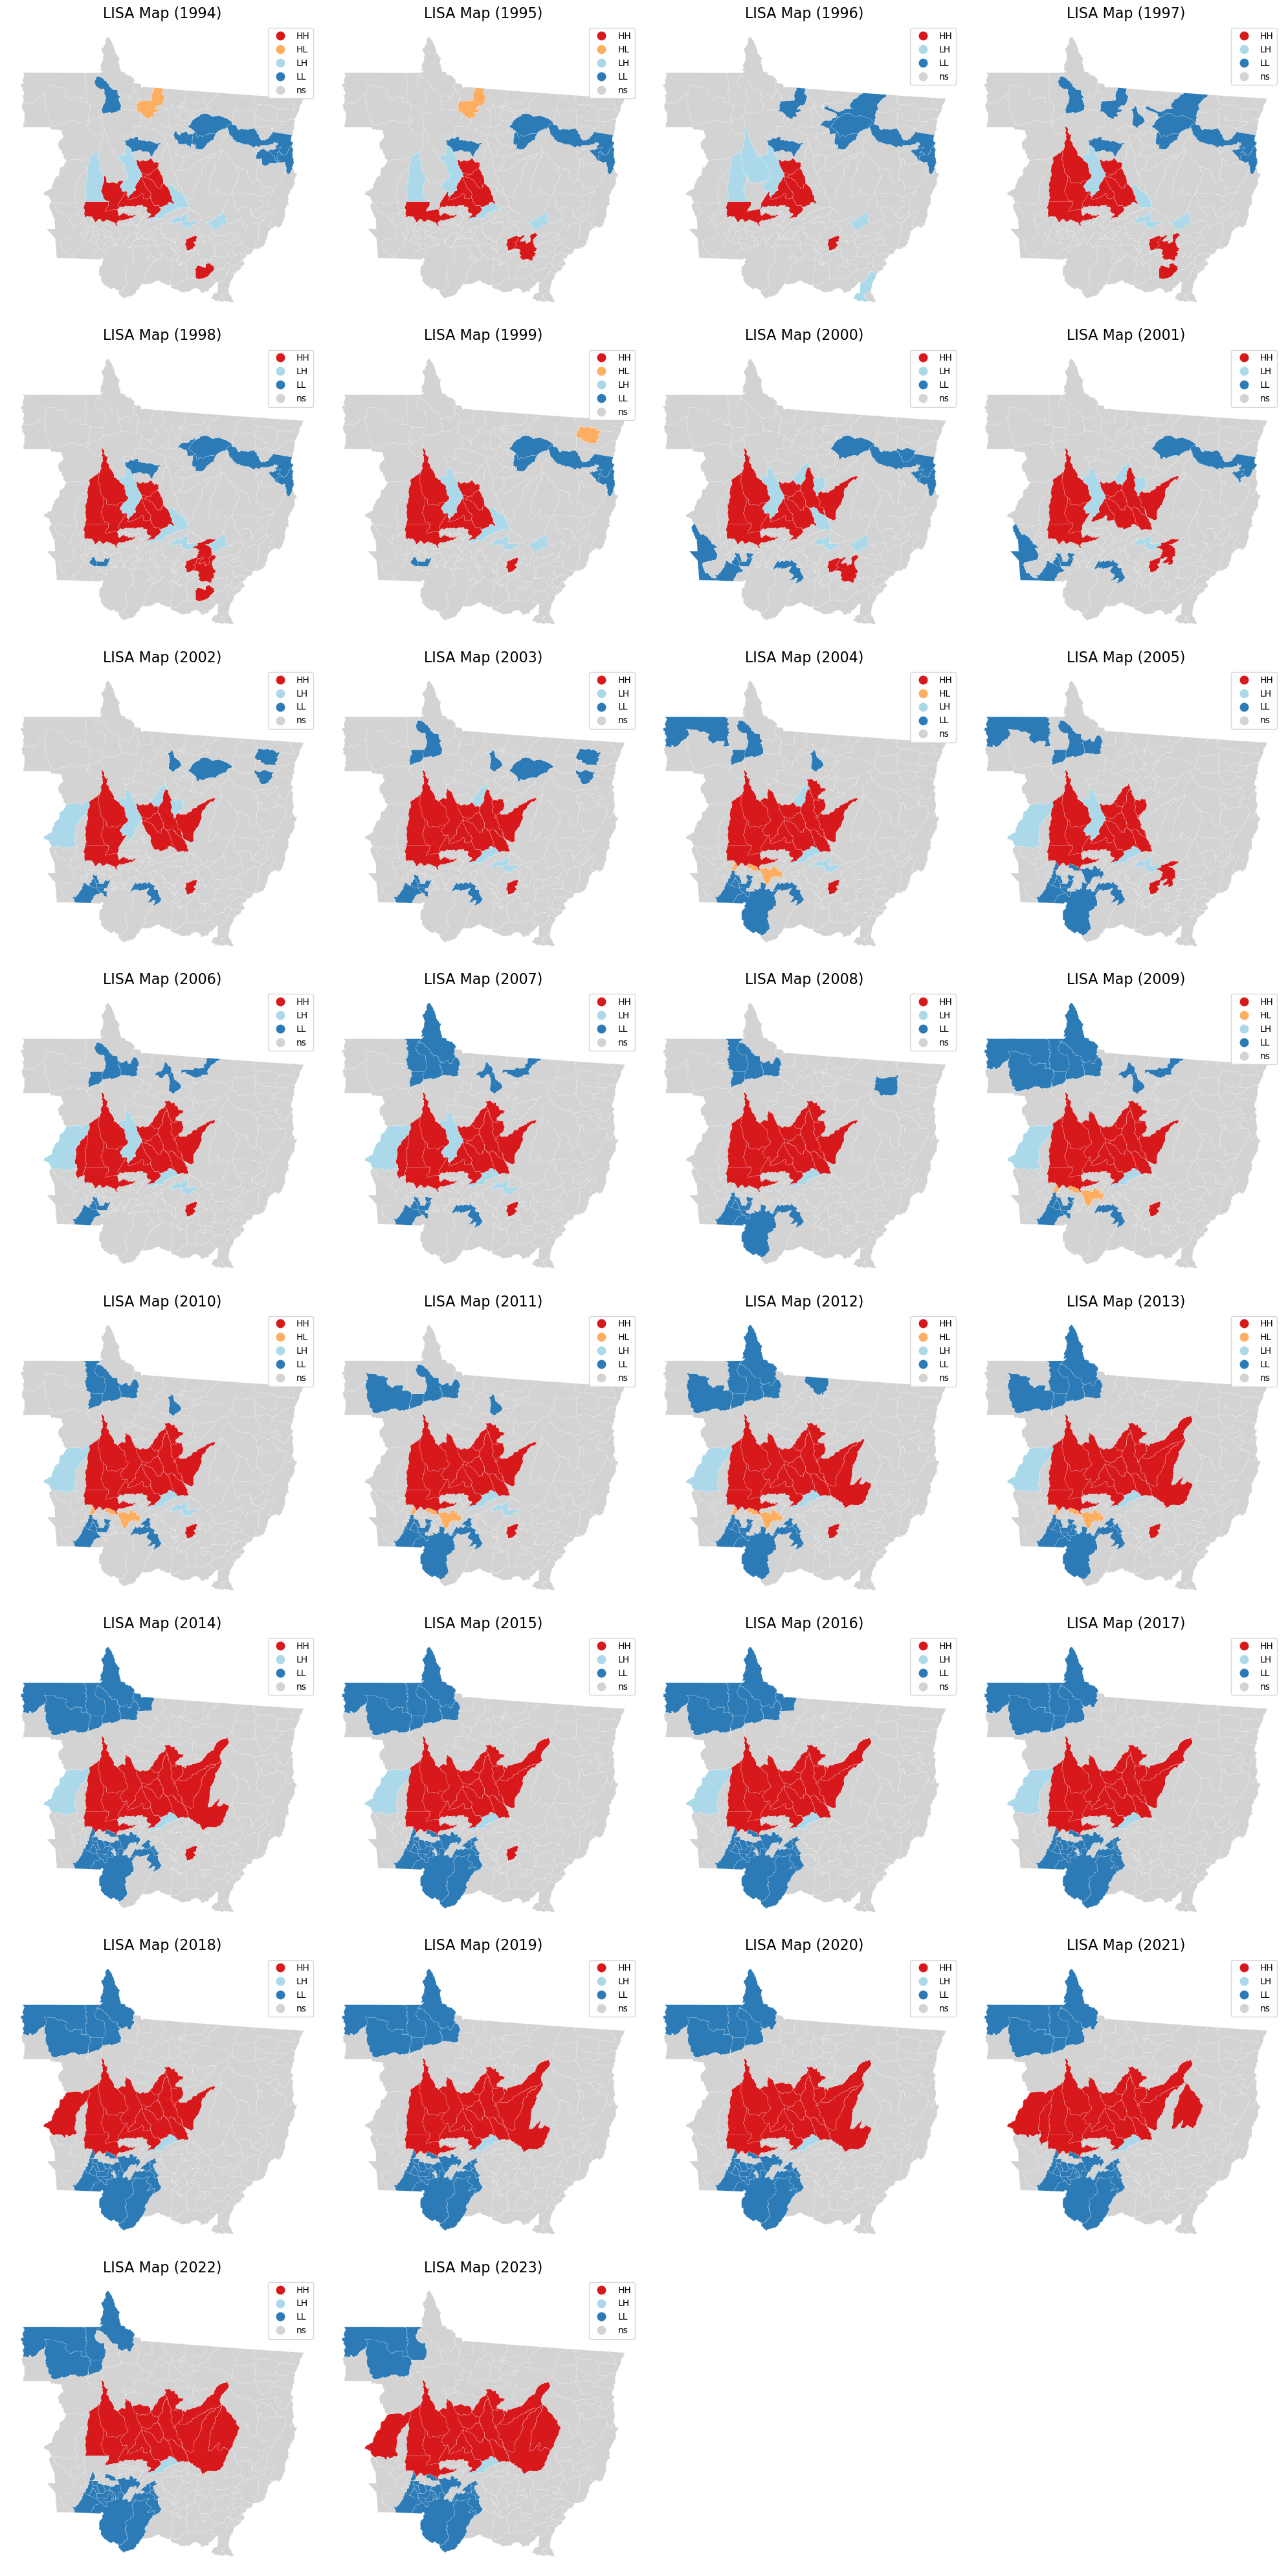

In [10]:
import matplotlib.pyplot as plt
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

fig, axes = plt.subplots(8, 4, figsize=(20, 40))  # 8 rows x 4 cols
axes = axes.flatten()

for i, year in enumerate(years):
    y = merged[year].values
    lisa = Moran_Local(y, W)
    lisa_cluster(lisa, merged, p=0.05, ax=axes[i])
    axes[i].set_title(f'LISA Map ({year})', fontsize=16)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [11]:
# Load highways shapefile
highways = gpd.read_file(
    r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Rodovias\SNV_202410A.shp"
)

# 1. Filter for Mato Grosso (MT) highways
MT = highways[highways['sg_uf'] == 'MT'].copy()

# 2. Group by 'vl_br' and combine geometries
highways_mt = MT.dissolve(by='vl_br', aggfunc='first')

# Reset index to make 'vl_br' a column again
highways_mt.reset_index(inplace=True)

highways_mt

vl_br                                           geometry  id_trecho_ sg_uf  \
0   070  MULTILINESTRING ((-55.40824 -15.81652, -55.408...      163538    MT   
1   080  MULTILINESTRING ((-50.59404 -13.21101, -50.939...      151683    MT   
2   158  MULTILINESTRING ((-51.0197 -9.74978, -51.02038...      153016    MT   
3   163  MULTILINESTRING ((-54.73981 -17.51972, -54.739...      153274    MT   
4   174  MULTILINESTRING ((-59.31376 -15.24322, -59.328...      158474    MT   
5   242  MULTILINESTRING ((-50.6582 -11.61516, -50.6613...      154202    MT   
6   251  MULTILINESTRING ((-51.08477 -14.91881, -51.089...      154318    MT   
7   364  MULTILINESTRING ((-53.2119 -17.31872, -53.2119...      155754    MT   

       nm_tipo_tr sg_tipo_tr desc_coinc   vl_codigo  \
0          Acesso          A          -  070AMT1005   
1  Eixo Principal          B          -  080BMT0270   
2  Eixo Principal          B          -  158BMT0170   
3  Eixo Principal          B          -  163BMT0560   
4          Acesso          A          -  174AMT1005   
5  Eixo Principal          B          -  242BMT0540   
6  Eixo Principal          B          -  251BMT0950   
7  Eixo Principal          B          -  364BMT0590   

                                        ds_local_i  \
0                    ENTR BR-163/364 (SÃO VICENTE)   
1    FIM DA PONTE SOBRE O RIO ARAGUAIA (DIV GO/MT)   
2     DIV PA/MT (INÍCIO DAS OBRAS DE PAVIMENTAÇÃO)   
3                                        DIV MS/MT   
4            ENTR BR-174/MT-473 (PONTES E LACERDA)   
5  ENTR MT-100 (DIV TO/MT) (SÃO FÉLIX DO ARAGUAIA)   
6                RIO ARAGUAIA (ARUANÃ) (DIV GO/MT)   
7          ENTR MT-100 (DIV GO/MT) (ALTO ARAGUAIA)   

                                          ds_local_f  ...  est_coinc  \
0                      ACESSO LESTE IFMT SÃO VICENTE  ...       None   
1                                     RIO DAS MORTES  ...       None   
2                            ENTR MT-431 (VILA RICA)  ...       None   
3                                        ENTR MT-299  ...       None   
4  AV.PRES. LEITE DE BRITO (VILA BELA DA SANTÍSSI...  ...     MT-170   
5                            ENTR MT-100 (P/LUCIARA)  ...     MT-109   
6                                        ENTR MT-100  ...     MT-251   
7                                    FIM PISTA DUPLA  ...       None   

   sup_est_co  ds_jurisdi ds_superfi   ds_legenda sg_legenda  \
0        None     Federal        PAV  Pavimentada        PAV   
1        None     Federal        PLA    Planejada        PLA   
2        None     Federal        PAV  Pavimentada        PAV   
3        None     Federal        PAV    Duplicada        DUP   
4         PAV     Federal        PAV  Pavimentada        PAV   
5         LEN     Federal      N_PAV   Implantada        IMP   
6         PAV     Federal        PLA    Planejada        PLA   
7        None     Federal        PAV    Duplicada        DUP   

                     leg_multim versao_snv id_versao marcador  
0                   Pavimentada    202410A        77        |  
1                     Planejada    202410A        77        |  
2                   Pavimentada    202410A        77        |  
3  Duplicada Concessão/Convênio    202410A        77        |  
4                   Pavimentada    202410A        77        |  
5                    Implantada    202410A        77        |  
6                     Planejada    202410A        77        |  
7                     Duplicada    202410A        77        |  

[8 rows x 29 columns]

C:\Users\daves\AppData\Local\Temp\ipykernel_18880\2792686404.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


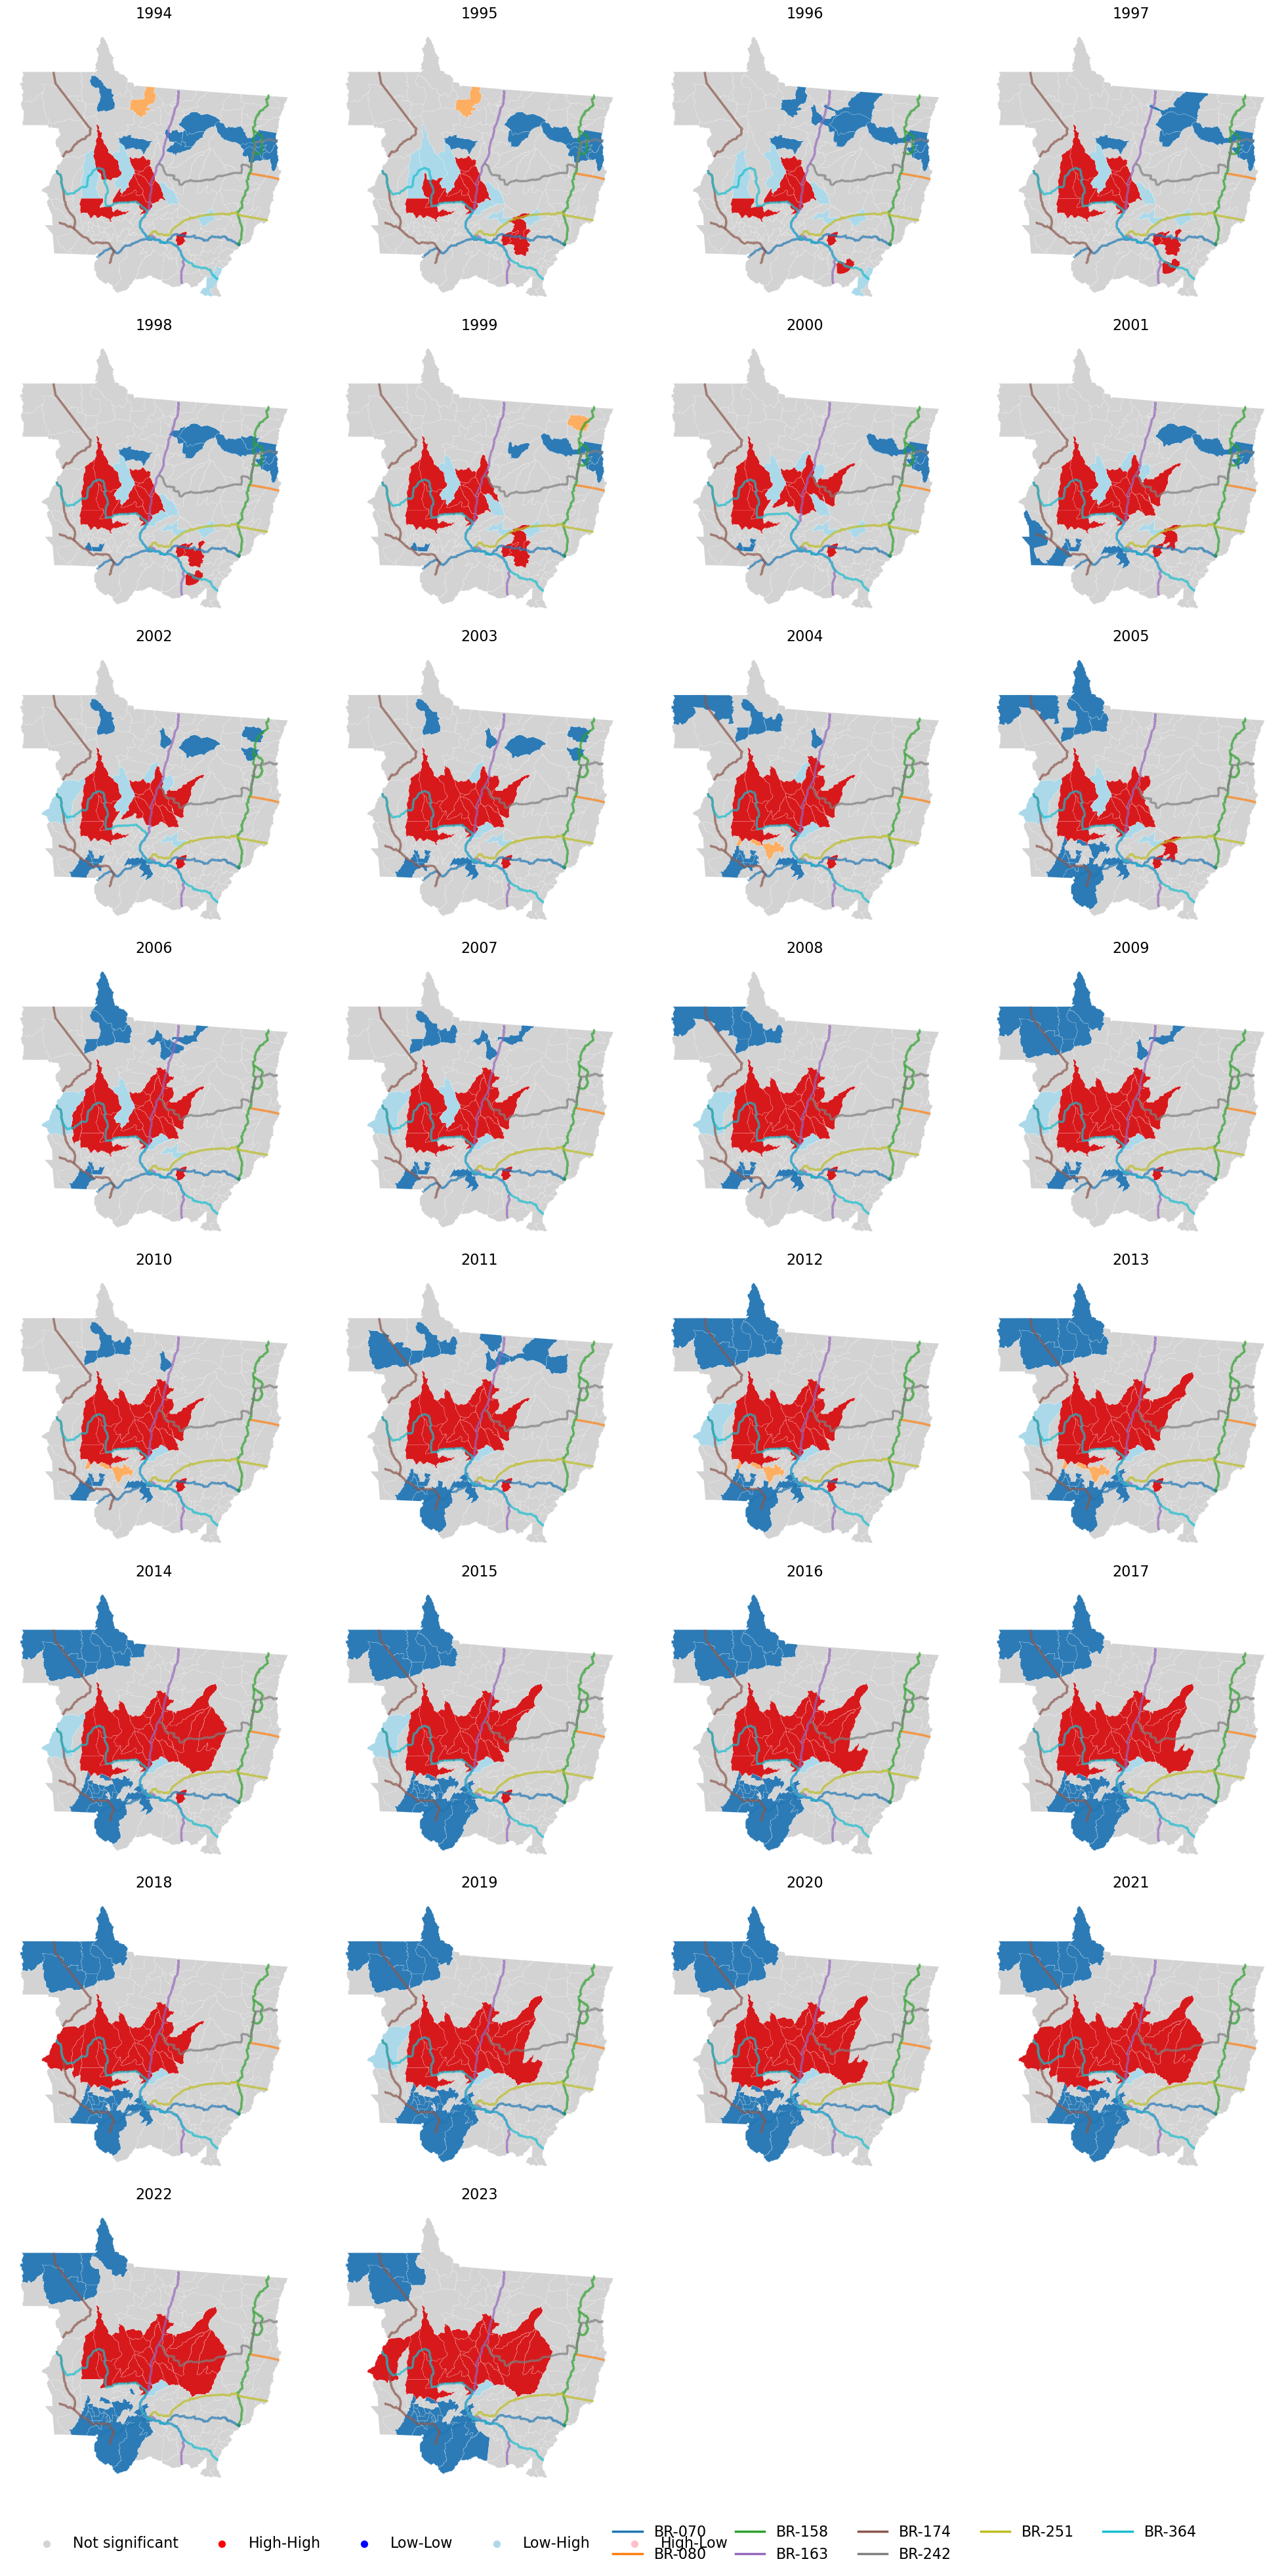

In [12]:
# Set up subplots
fig, axes = plt.subplots(8, 4, figsize=(20, 40))
axes = axes.flatten()

# Get unique highway classes
highway_classes = highways_mt['vl_br'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(highway_classes)))

# Plot each map
for i, year in enumerate(years):
    y = merged[year].values
    lisa = Moran_Local(y, W)
    
    # Plot LISA clusters without including legend in each subplot
    lisa_cluster(lisa, merged, p=0.05, ax=axes[i], legend=False)  # Add legend=False parameter if available
    
    # Plot highways with thicker lines but no legend
    for class_val, color in zip(highway_classes, colors):
        subset = highways_mt[highways_mt['vl_br'] == class_val]
        subset.plot(
            ax=axes[i],
            color=color,
            linewidth=2.5,
            alpha=0.7,
            label=None  # This prevents legend entries for each subplot
        )
    
    axes[i].set_title(f'{year}', fontsize=16)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Create a new axis for the LISA legend at the bottom
lisa_legend_ax = fig.add_axes([0.2, 0.02, 0.2, 0.02])
lisa_legend_ax.axis('off')

# Create the LISA legend items
lisa_categories = {
    'Not significant': 'lightgrey',
    'High-High': 'red',
    'Low-Low': 'blue',
    'Low-High': 'lightblue',
    'High-Low': 'pink'
}
for label, color in lisa_categories.items():
    lisa_legend_ax.scatter([], [], c=color, label=label, s=50)
lisa_legend_ax.legend(loc='center', ncol=5, fontsize=16, frameon=False)

# Create a new axis for the highway legend at the bottom
highway_legend_ax = fig.add_axes([0.6, 0.02, 0.2, 0.02])
highway_legend_ax.axis('off')

# Create the highway legend items
for class_val, color in zip(highway_classes, colors):
    highway_legend_ax.plot([], [], color=color, linewidth=2.5, label=f'BR-{class_val}')
highway_legend_ax.legend(loc='center', ncol=min(5, len(highway_classes)), fontsize=16, frameon=False)

plt.tight_layout()
# Adjust the layout to make room for the legends at the bottom
plt.subplots_adjust(bottom=0.05)
plt.show()